In [1]:
%matplotlib notebook
from ipywidgets import *

import os
import pandas as pd
import ast

import seaborn as sns
import matplotlib.pyplot as plt

import scipy
import numpy as np

import glob

%matplotlib inline

from my_library import *

In [2]:
data_directory = '../chess_resources/csv'

csv_files = glob.glob(data_directory + "/*.csv")
print("Found " + str(len(csv_files)) + " csv files")

constrains = []
for file in csv_files:
    constrains.append(file.split("/")[-1].split(".")[0])

# to python array
constrains = [ast.literal_eval(c) for c in constrains]

for c in constrains:
    print(c)

constraint_piece_indexes = {
    'queen': 0,
    'rook': 1,
    'bishop': 2,
    'knight': 3,
    'pawn': 4
}

# filter negligible values
treshold_percent = 0.05
print("\nSetting treshold for negligible values to " + str(treshold_percent) + "%")

Found 10 csv files
(1, 2, 2, 2, 7)
(1, 2, 2, 1, 8)
(1, 2, 1, 2, 8)
(0, 2, 2, 2, 8)
(1, 2, 2, 1, 7)
(1, 2, 1, 2, 7)
(0, 2, 2, 2, 7)
(1, 2, 1, 1, 7)
(1, 2, 2, 0, 7)
(1, 2, 0, 2, 7)

Setting treshold for negligible values to 0.05%


# One **Pawn** missing

In [3]:
file_name = '(1, 2, 2, 2, 7).csv'
full_name = os.path.join(data_directory, file_name)
display('File name: ' + full_name)

df = pd.read_csv(full_name, sep=";")
display(df.shape)
display(df.head())
display(df.dtypes)

'File name: ../chess_resources/csv/(1, 2, 2, 2, 7).csv'

(199002, 13)

,id,result,white_elo,black_elo,time_control,eco,opening,satisfied_after,queen_pos,rook_pos,bishop_pos,knight_pos,pawn_pos
0,0,1,1500,1208,60+5,A40,Modern Defense,21,"[11,]","[0,7,]","[5,20,]","[18,39,]","[8,9,14,21,26,27,28,]"
1,1,0,1975,1622,60+0,B01,Scandinavian Defense: Mieses-Kotroc Variation,3,"[3,]","[0,7,]","[2,5,]","[1,6,]","[8,9,10,11,13,14,15,]"
2,4,0,1354,1527,420+0,A45,Indian Game,9,"[12,]","[0,7,]","[2,19,]","[1,6,]","[9,10,13,14,15,16,20,]"
3,5,0,1652,2233,60+0,B80,Sicilian Defense: Scheveningen Variation,5,"[3,]","[0,7,]","[2,5,]","[1,21,]","[8,9,10,13,14,15,28,]"
4,7,0,1812,1861,180+0,B57,"Sicilian Defense: Modern Variations, Main Line",5,"[3,]","[0,7,]","[2,5,]","[1,21,]","[8,9,10,13,14,15,28,]"


id                  int64
result              int64
white_elo           int64
black_elo           int64
time_control       object
eco                object
opening            object
satisfied_after     int64
queen_pos          object
rook_pos           object
bishop_pos         object
knight_pos         object
pawn_pos           object
dtype: object

## Removing Very Beginner Games

In [4]:
bad_game_elo_threshold = 1000
display('Removing games with elo < ' + str(bad_game_elo_threshold))

original_count = df.shape[0]
df = df[df['white_elo'] > bad_game_elo_threshold]
new_count = df.shape[0]
display('Removed ' + str(original_count - new_count) + ' games out of ' + str(original_count) + ' (' + str(round((original_count - new_count) / original_count * 100, 2)) + '%)')


'Removing games with elo < 1000'

'Removed 455 games out of 199002 (0.23%)'

## Converting objects

In [5]:
# first convert 'object' to arrays
arrays_columns = ['queen_pos', 'rook_pos', 'bishop_pos', 'knight_pos', 'pawn_pos']
for col in arrays_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x))

df.dtypes[arrays_columns]

queen_pos     object
rook_pos      object
bishop_pos    object
knight_pos    object
pawn_pos      object
dtype: object

# Analysing
## Correlation HeatMap

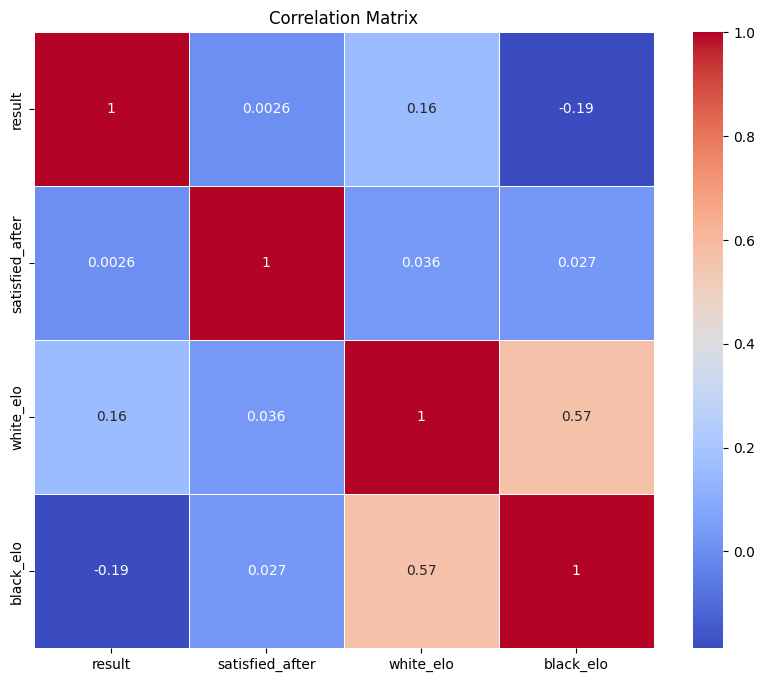

In [6]:
# only for ordinal data
corr_matrix = df[['result', 'satisfied_after', 'white_elo', 'black_elo']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

$=>$ Jeno **white_elo** a **black_elo** jsou korelované, ale to není překvapující. Mezi ostatními není žádná korelace.

## Drop unnecessary columns

In [7]:
df.drop(columns=['id', 'white_elo', 'black_elo', 'time_control'], inplace=True)
df.head()

,result,eco,opening,satisfied_after,queen_pos,rook_pos,bishop_pos,knight_pos,pawn_pos
0,1,A40,Modern Defense,21,[11],"[0, 7]","[5, 20]","[18, 39]","[8, 9, 14, 21, 26, 27, 28]"
1,0,B01,Scandinavian Defense: Mieses-Kotroc Variation,3,[3],"[0, 7]","[2, 5]","[1, 6]","[8, 9, 10, 11, 13, 14, 15]"
2,0,A45,Indian Game,9,[12],"[0, 7]","[2, 19]","[1, 6]","[9, 10, 13, 14, 15, 16, 20]"
3,0,B80,Sicilian Defense: Scheveningen Variation,5,[3],"[0, 7]","[2, 5]","[1, 21]","[8, 9, 10, 13, 14, 15, 28]"
4,0,B57,"Sicilian Defense: Modern Variations, Main Line",5,[3],"[0, 7]","[2, 5]","[1, 21]","[8, 9, 10, 13, 14, 15, 28]"


## Winning

count    198547.000000
mean          0.509245
std           0.499916
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: result, dtype: float64

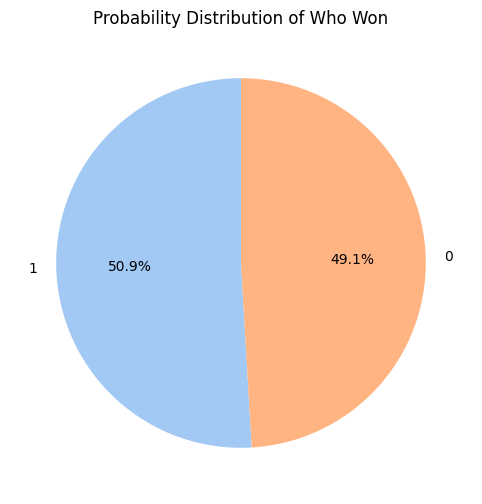

In [8]:
display(df['result'].describe())

value_counts = df['result'].value_counts()
prob_distribution = value_counts / value_counts.sum()

# Plotting the probability distribution
# Plotting the pie chart

plt.figure(figsize=(8, 6))
plt.pie(prob_distribution, labels=prob_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel')[0:value_counts.shape[0]])
plt.title('Probability Distribution of Who Won')
plt.show()

This implies the current constrain combination **Does Not AFFECT** chance to win. This make sense as it is only start of the game.

## Number of satisfied Move

count    198547.000000
mean          9.627675
std           6.180253
min           3.000000
25%           5.000000
50%           7.000000
75%          13.000000
max          61.000000
Name: satisfied_after, dtype: float64

'Median: 7.0'

Negligible values: Index([10, 12, 14, 16, 22, 39, 41, 43, 45, 47, 49, 51, 55, 57, 61], dtype='int64', name='satisfied_after')


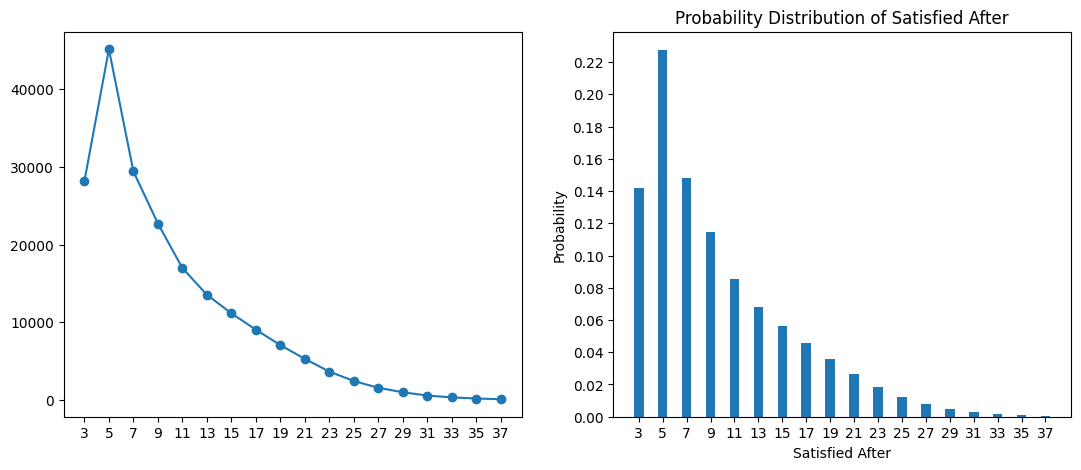

In [9]:
display(df['satisfied_after'].describe())
display('Median: ' + str(df['satisfied_after'].median()))

value_counts = df['satisfied_after'].value_counts()
value_counts = value_counts.sort_index()

threshold_value = (treshold_percent/100) * value_counts.sum()
negligible_values = value_counts[value_counts <= threshold_value].index
print("Negligible values: " + str(negligible_values))

value_counts = value_counts[value_counts > threshold_value]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

axes[0].plot(value_counts.index, value_counts.values, marker='o')
plt.xlabel('Satisfied After')
plt.ylabel('Number of Orders')
axes[0].set_xticks(value_counts.index)

prob_distribution = value_counts / value_counts.sum()

# Plotting the probability distribution
axes[1].bar(prob_distribution.index, prob_distribution.values)
plt.xlabel('Satisfied After')
plt.ylabel('Probability')
plt.title('Probability Distribution of Satisfied After')
axes[1].set_xticks(value_counts.index)
axes[1].set_yticks(np.arange(0, prob_distribution.max(), 0.02))

plt.show()

The reason why all values are odd is because it's always white's move.<br/><br/>
$=>$ This Constraint is satisfied after **10** moves on average and median of **7** moves.

<br/>




## Piece positions
#### Queen

Negligible values: Index([[63],  [1], [35], [27], [50], [33], [49], [36], [26], [14], [28], [55],
       [34], [25], [40], [47], [16], [53], [54],  [9],  [5], [15], [56], [32],
       [46],  [6], [48], [42], [37],  [8], [62],  [7],  [0], [45], [43], [41],
       [44], [59], [52]],
      dtype='object', name='queen_pos')


,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps,opening
0,[3],['d1'],0.907745,0.511442,0.488558,0,8.776343,7.0,Scandinavian Defense: Mieses-Kotroc Variation
1,[12],['e2'],0.019476,0.501819,0.498181,0,17.937630,17.0,Van't Kruijs Opening
2,[11],['d2'],0.016520,0.515625,0.484375,0,20.631740,21.0,Owen Defense
3,[10],['c2'],0.015341,0.510063,0.489937,0,19.762125,19.0,Horwitz Defense
4,[21],['f3'],0.014369,0.443114,0.556886,0,12.773160,11.0,King's Pawn Game: Napoleon Attack


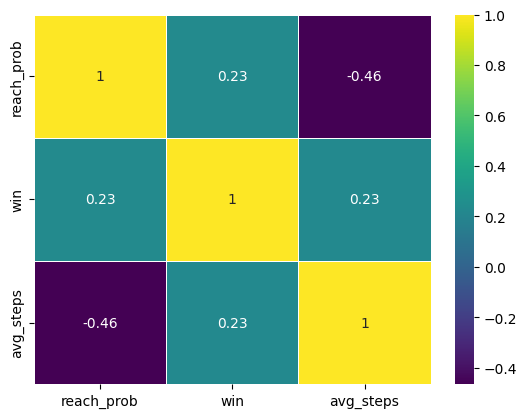

In [15]:
result_df, _  = analyse_piece(df, 'queen_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.show()

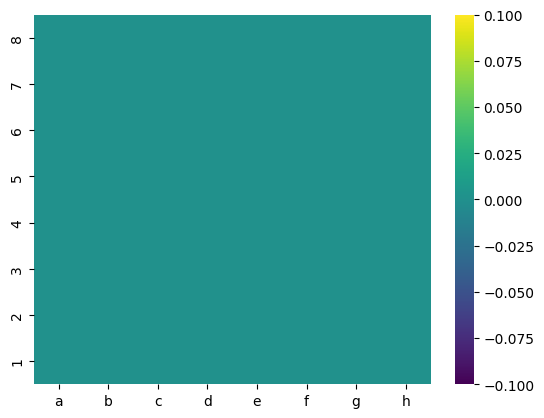

In [11]:
import math

square_probabs = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        square_number = i * 8 + j

        if square_number in result_df['position_int'].values:
            square_probabs[i][j] = math.log(result_df.loc[result_df['position_int'] == square_number, 'reach_prob'].values[0] + 1)
        else:
            square_probabs[i][j] = 0

square_probabs = np.flip(square_probabs, 0)

heat_map = sns.heatmap(data=square_probabs, cmap='viridis', xticklabels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], yticklabels=['8', '7', '6', '5', '4', '3', '2', '1'])
plt.show()

$=>$ Vidíme, že ve většině případů se dáma nehne, zůstává na **d1(91%)** a v pak nejčastěji je na políčkách **c2(1.8%), d2(1.7%), e2(1.6%), f3(1.1%), b2(0.6%)**.\
Podíváme, jestli tyto nejčastější pozice nějak ovlivňují šanci na výhru:\
Vidíme, že dáma na políčkách **d1, c2, d2, e2 a b2** neovlivňuje šanci na výhru. Zato není zanedbatelný rozdíl **13% větší** šance na výhru, pokuď se nachází na **f3**. Je možné, že to je kvůli jednoduchému matu 3 tahy.

#### Rook

Negligible values: Index([  [3, 4],   [1, 4],  [0, 15],   [7, 8],   [4, 5],  [0, 13],   [2, 3],
        [0, 23],   [5, 8],  [7, 16],   [6, 7],   [3, 6],   [0, 2],  [0, 22],
         [0, 1],   [4, 7],  [0, 21],   [5, 7],  [0, 14],   [1, 6],  [0, 12],
        [0, 31],   [1, 3],  [5, 13],  [8, 15],  [7, 17],  [5, 16],  [7, 19],
        [7, 10],  [7, 24],  [7, 18],  [5, 21],  [3, 15],  [1, 13],  [2, 13],
         [4, 8],   [2, 6],  [0, 39],   [5, 9],  [0, 28],  [7, 21],  [2, 14],
         [1, 2],  [7, 15],  [0, 19],  [2, 21],  [0, 47],  [1, 21],   [0, 8],
         [0, 9],  [0, 55],  [4, 16],  [4, 12],  [8, 13],  [8, 23],  [4, 13],
        [3, 10],  [0, 20],  [3, 22],  [0, 49],  [7, 11],  [5, 10],   [7, 9],
        [1, 15],  [7, 35],  [0, 24],  [7, 32],  [0, 17],  [7, 20],  [5, 17],
        [6, 15],  [7, 26],  [3, 11],   [4, 6],  [2, 10], [17, 23],  [2, 31],
        [6, 17],  [7, 28]],
      dtype='object', name='rook_pos')


,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps,opening
0,"[0, 7]","['a1', 'h1']",0.846749,0.506765,0.493235,0,7.974128,7.0,Scandinavian Defense: Mieses-Kotroc Variation
1,"[0, 5]","['a1', 'f1']",0.117284,0.522449,0.477551,0,17.528395,17.0,Hungarian Opening
2,"[0, 4]","['a1', 'e1']",0.016010,0.538826,0.461174,0,19.791667,19.0,Ruy Lopez: Steinitz Defense
3,"[3, 7]","['d1', 'h1']",0.008793,0.508046,0.491954,0,21.414943,21.0,Van't Kruijs Opening
4,"[2, 5]","['c1', 'f1']",0.002593,0.538012,0.461988,0,25.003899,25.0,Horwitz Defense


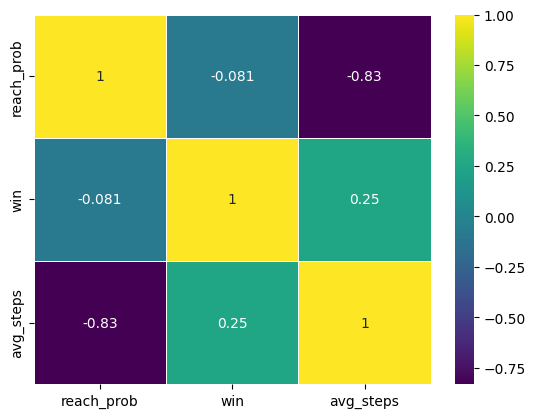

In [17]:
result_df, _ = analyse_piece(df, 'rook_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.show()

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.51829225e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51829225e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51829225e-06]
 [2.51829225e-06 0.00000000e+00 0.00000000e+00 2.51829225e-06
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.03657815e-06]
 [1.00731309e-05 0.00000000e+00 2.51829225e-06 0.00000000e+00
  5.03657815e-06 0.00000000e+00 0.00000000e+00 2.01461604e-05]
 [5.54009645e-05 1.76279125e-05 5.03657815e-06 1.00731309e-05
  5.03657815e-06 4.02919149e-05 3.77737178e-05 7.30279005e-05]
 [2.01443342e-04 7.55485771e-06 1.51096583e-05 5.03657815e-06
  2.01461604e-05 1.23388863e-04 2.77008659e-05 1.81300834e-04]
 [3.98637418e-01 2.21113531e-03 2.51010587e-03 5.60760164e-03
  8.72549000e-03 5.97535048e-02 4.63259036e-04 3.56396130e-01]]

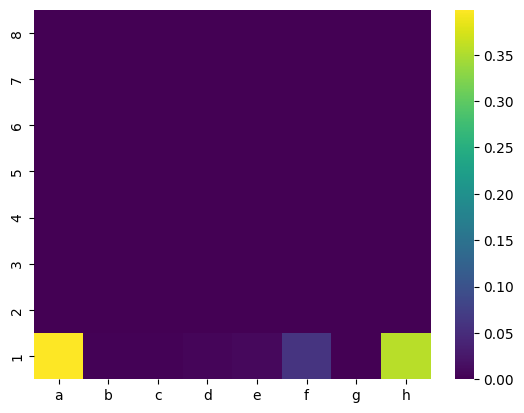

In [ ]:
value_counts = df['rook_pos'].explode().value_counts()
value_counts = value_counts / value_counts.sum()

square_probabs = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        square_number = i * 8 + j

        if square_number in value_counts.index:
            square_probabs[i][j] = math.log(value_counts[square_number] + 1)
        else:
            square_probabs[i][j] = 0

square_probabs = np.flip(square_probabs, 0)
print(square_probabs)

heat_map = sns.heatmap(data=square_probabs, cmap='viridis', xticklabels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], yticklabels=['8', '7', '6', '5', '4', '3', '2', '1'])
plt.show()

$=>$ Vidíme, že ve většině případů se věž nehne **[a1, h1] (82.7%)**. Poté ve **12%** je udělaná malá rošáda **[a1, f1]** a ve **2%** se po ní pohne o jedno políčko doleva **[a1, e1]**. V **0.84%** je udělána velká rošáda **[d1, h1]**. Ostatní jsou zanedbatelné.

#### Bishop

Negligible values: Index([[11, 17], [12, 31], [22, 26],  [8, 11], [33, 38],  [5, 18], [26, 31],
        [5, 13], [12, 15],  [5, 47],
       ...
       [33, 45], [19, 34], [33, 63],  [9, 55], [25, 42], [21, 47],  [2, 51],
       [16, 46], [10, 27], [12, 54]],
      dtype='object', name='bishop_pos', length=305)


,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps,opening
0,"[2, 5]","['c1', 'f1']",0.566427,0.510888,0.489112,0,5.979330,5.0,Scandinavian Defense: Mieses-Kotroc Variation
1,"[2, 26]","['c1', 'c4']",0.112328,0.503244,0.496756,0,9.663590,9.0,Sicilian Defense: Bowdler Attack
2,"[2, 19]","['c1', 'd3']",0.037008,0.526630,0.473370,0,14.043828,13.0,Owen Defense
3,"[2, 14]","['c1', 'g2']",0.036325,0.510103,0.489897,0,14.343507,13.0,Hungarian Opening
4,"[2, 12]","['c1', 'e2']",0.031967,0.490848,0.509152,0,14.593128,15.0,Van't Kruijs Opening


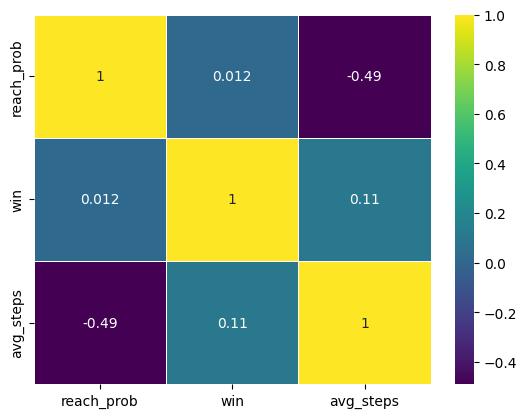

In [18]:
result_df, _ = analyse_piece(df, 'bishop_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.show()

#### Knight

Negligible values: Index([ [6, 22],  [6, 24], [11, 31], [10, 21], [11, 13], [11, 23],   [1, 4],
       [18, 29],  [6, 28],  [1, 29],
       ...
       [16, 20], [11, 52], [16, 26], [12, 39], [31, 39], [24, 28], [26, 36],
       [13, 20], [13, 33], [26, 28]],
      dtype='object', name='knight_pos', length=398)


,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps,opening
0,"[1, 6]","['b1', 'g1']",0.330999,0.498913,0.501087,0,5.668525,5.0,Scandinavian Defense: Mieses-Kotroc Variation
1,"[1, 21]","['b1', 'f3']",0.310868,0.513312,0.486688,0,8.598856,7.0,French Defense: Knight Variation
2,"[18, 21]","['c3', 'f3']",0.142367,0.515021,0.484979,0,13.502636,13.0,Philidor Defense #2
3,"[6, 18]","['g1', 'c3']",0.089500,0.524124,0.475876,0,8.911775,7.0,Horwitz Defense
4,"[11, 21]","['d2', 'f3']",0.028181,0.537942,0.462058,0,18.388179,19.0,Horwitz Defense


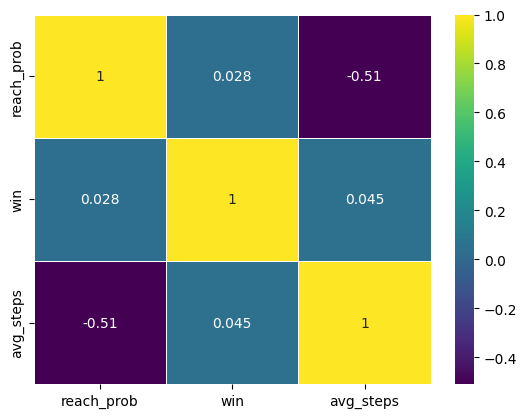

In [19]:
result_df, _ = analyse_piece(df, 'knight_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.show()

#### Pawn

Negligible values: Index([  [8, 9, 10, 14, 15, 20, 21],   [8, 9, 10, 13, 19, 23, 28],
        [9, 10, 13, 14, 16, 23, 27],  [8, 12, 13, 15, 17, 22, 26],
         [8, 9, 14, 15, 26, 27, 28],   [8, 9, 10, 13, 14, 15, 34],
       [13, 14, 16, 20, 23, 25, 27], [10, 11, 13, 14, 15, 20, 24],
         [8, 9, 11, 14, 15, 18, 21],  [9, 13, 14, 15, 16, 18, 19],
       ...
        [8, 13, 14, 15, 19, 33, 36],  [8, 11, 14, 15, 20, 25, 34],
       [10, 13, 14, 15, 24, 33, 37],  [9, 13, 15, 22, 25, 28, 35],
        [9, 14, 16, 23, 26, 35, 36],  [9, 10, 14, 20, 27, 29, 39],
       [14, 15, 18, 20, 21, 24, 25],   [8, 9, 19, 28, 29, 30, 39],
       [13, 17, 19, 22, 23, 26, 28],   [8, 9, 13, 19, 26, 38, 39]],
      dtype='object', name='pawn_pos', length=8307)


,position_int,position_str,reach_prob,win,lost,draw,avg_steps,median_steps,opening
0,"[8, 9, 10, 13, 14, 15, 28]","['a2', 'b2', 'c2', 'f2', 'g2', 'h2', 'e4']",0.216124,0.508724,0.491276,0,6.104171,5.0,Scotch Game
1,"[8, 9, 10, 11, 13, 14, 15]","['a2', 'b2', 'c2', 'd2', 'f2', 'g2', 'h2']",0.157124,0.507192,0.492808,0,5.088214,5.0,Scandinavian Defense: Mieses-Kotroc Variation
2,"[8, 9, 10, 13, 14, 15, 27]","['a2', 'b2', 'c2', 'f2', 'g2', 'h2', 'd4']",0.076114,0.506767,0.493233,0,7.146419,5.0,French Defense: Exchange Variation
3,"[8, 9, 12, 13, 14, 15, 27]","['a2', 'b2', 'e2', 'f2', 'g2', 'h2', 'd4']",0.059713,0.585320,0.414680,0,5.010665,5.0,Queen's Gambit Accepted
4,"[8, 9, 10, 11, 14, 15, 28]","['a2', 'b2', 'c2', 'd2', 'g2', 'h2', 'e4']",0.036874,0.585676,0.414324,0,4.412801,3.0,"King's Gambit Accepted, King's Knight Gambit"


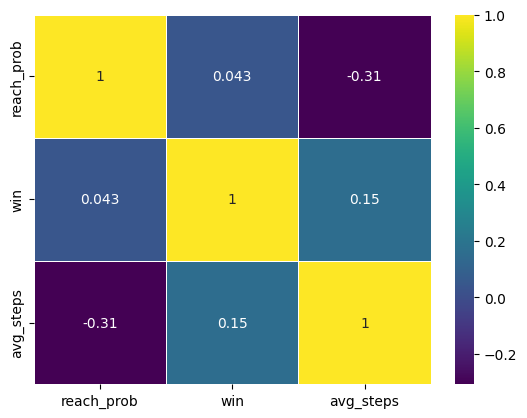

In [20]:
result_df, _ = analyse_piece(df, 'pawn_pos', treshold_percent)
display(result_df.head())

corr_matrix = result_df[['reach_prob', 'win', 'avg_steps']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.show()